# Day 6: Probably a Fire Hazard

In [20]:
import re

import numpy as np
import seaborn as sns

from tools import loader, parsers

DATA = parsers.lines(loader.get(2015, 6))

For this puzzle it's convenient to use Numpy because the input gives us areas of a 2D array, and Numpy allows us to work with them pretty much directly by converting given coordinates to slices. The only tricky part is figuring out which coordinate goes where.

In [21]:
grid = np.zeros((1000, 1000), dtype=bool)
for line in DATA:
    nums = tuple(map(int, re.findall(r'\d+', line)))
    area = np.s_[nums[0]:nums[2] + 1, nums[1]:nums[3] + 1]
    if line.startswith('turn on'):
        grid[area] = True
    elif line.startswith('turn off'):
        grid[area] = False
    elif line.startswith('toggle'):
        grid[area] = np.invert(grid[area])
print(np.count_nonzero(grid))

569999


For part 2 we can use the same code, but we need to redefine what our operations are. Here I use np.clip with the lower boundary set to zero to prevent values from going negative after substraction.

In [22]:
grid = np.zeros((1000, 1000), dtype=int)
for line in DATA:
    nums = tuple(map(int, re.findall(r'\d+', line)))
    area = np.s_[nums[0]:nums[2] + 1, nums[1]:nums[3] + 1]
    if line.startswith('turn on'):
        grid[area] += 1
    elif line.startswith('turn off'):
        grid[area] = np.clip(np.subtract(grid[area], 1), 0, np.inf)
    elif line.startswith('toggle'):
        grid[area] += 2
print(np.sum(grid))

17836115


<Axes: >

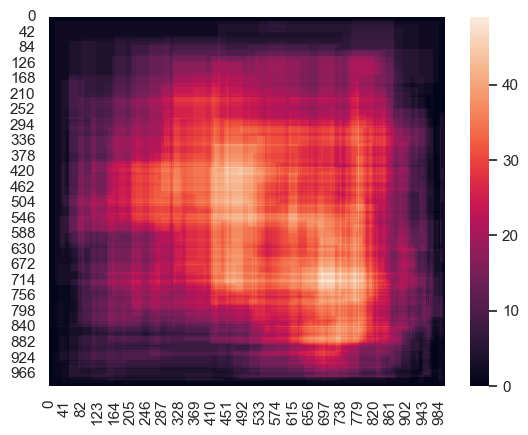

In [23]:
sns.heatmap(grid)